<a href="https://colab.research.google.com/github/Data-alchemist-mani/Housing_Data_Singapore/blob/master/project_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [93]:
!pip install category_encoders
!pip install pandas-profiling==2.*
!pip install dash
!pip install plotly_express
!pip install xgboost
!pip install pdpbox
!pip install shap
!pip install eli5
!pip install chart_studio
!pip install plotly

In [0]:
import sys
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
import category_encoders as ce
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.ensemble import RandomForestRegressor
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.metrics import mean_absolute_error
import dash
import shap
import eli5.sklearn
from xgboost import XGBRegressor
from sklearn.linear_model import LinearRegression
from eli5.sklearn import PermutationImportance
import plotly_express
import chart_studio
import pandas_profiling
from pandas_profiling import ProfileReport
import plotly_express as px
from pdpbox.pdp import pdp_isolate, pdp_plot, pdp_interact, pdp_interact_plot
pd.set_option('display.float_format', lambda x: '%.3f' % x)
df = pd.read_csv('drive/My Drive/Housing_Data.csv')
df = df.drop(columns=['Unnamed: 0'])
mae = mean_absolute_error

In [95]:
# mean base line 
guess = df['value'].mean()

errors = guess - df['value']

mean_absolute_error = errors.abs().mean()

print(f'If we just guessed every Housing unit solf for ${guess:,.0f}')
print(f'we would be off by ${mean_absolute_error:,.0f} on average.')

If we just guessed every Housing unit solf for $481,441
we would be off by $118,832 on average.


In [96]:
# cleaning my data
df = pd.read_csv('drive/My Drive/Housing_Data.csv')
df = df.drop(columns=['Unnamed: 0'])
df['hasFloorplans'] = df['hasFloorplans'].astype(int)
df['latitude'] = df['latitude'].replace({' Partially  Furnished ': np.nan, ' Fully  Furnished ': np.nan, 'Unfurnished': np.nan, 'UNKNOWN': np.nan})
df['latitude'] = df['latitude'].astype(float)
df['longitude'] = df['longitude'].replace({' Partially  Furnished ': np.nan, ' Fully  Furnished ': np.nan, 'Unfurnished': np.nan, 'UNKNOWN': np.nan})
df['longitude'] = df['longitude'].astype(float)
df['floorArea'] = df['floorArea'].replace({'sqft': np.nan })
df['floorArea'].astype(float)
df['bathrooms'].replace({'UNKNOWN': np.NaN}, inplace=True)
df['pricePerSqFt'].replace({'sqrt' : ''}, inplace=True)
df['districtText'].replace({'/':' '}, inplace=True)
df['floorArea'] = df['floorArea'].astype(float)
df['pricePerSqFt'] = df['pricePerSqFt'].replace({'sqft': np.nan}).astype(float)
df['bathrooms'] = df['bathrooms'].astype(float)
dropper = df[df['furnishingCode'] == 'UNKNOWN'].index
df = df.drop(dropper)
# train test plitt in my data
train, test = train_test_split(df, test_size=0.2, random_state=22)
train, val = train_test_split(train, test_size = 0.2, random_state=34)
target = 'value'
features = train.columns.drop([target,
                               'pricePerSqFt',
                               'floorArea'])
'''key poiint for blog
dropping price per square feet and floor area because those two columns were
causing leekage'''

''' '''
X_train = train[features]
y_train = train[target]
X_val = val[features]
y_val = val[target]
X_test = test[features]
y_yest = test[target]

pipeline = make_pipeline(
    ce.OrdinalEncoder(),
    SimpleImputer(),
    RandomForestRegressor(
        n_estimators=200,
        n_jobs=-1)
)

pipeline.fit(X_train, y_train)


print(f'R^2 score: {pipeline.score(X_val, y_val)}')
y_pred = pipeline.predict(X_val)
print(f'mean absolute error: {mae(y_val, y_pred)}')

R^2 score: 0.8115868814570322
mean absolute error: 40757.875389290086


In [97]:
train.columns

Index(['districtText', 'furnishingCode', 'value', 'floorArea', 'bedrooms',
       'bathrooms', 'pricePerSqFt', 'hasFloorplans', 'latitude', 'longitude'],
      dtype='object')

In [98]:
#plotting my data points
fig = px.scatter_mapbox(X_train, lat='latitude', lon='longitude', color='furnishingCode', opacity=0.1)
fig.update_layout(mapbox_style='stamen-terrain')
fig.show()

In [99]:
fig = px.scatter_mapbox(X_test, lat='latitude', lon='longitude', color='furnishingCode', opacity=0.1)
fig.update_layout(mapbox_style='stamen-terrain')
fig.show()

In [100]:
fig = px.scatter_mapbox(test, lat='latitude', lon='longitude', color='furnishingCode',hover_data=['value', pipeline.predict(X_test)], opacity=0.1)
fig.update_layout(mapbox_style='stamen-terrain')
fig.show()

In [101]:
[X_train == np.NaN] == True

False

In [102]:
encoder = ce.OneHotEncoder(use_cat_names=True)
X_train = encoder.fit_transform(X_train)
imputer = SimpleImputer(strategy='most_frequent')
X_train = imputer.fit_transform(X_train)




K = range(1,17)

distortion = []

for k in K:
  kmeans = KMeans(n_clusters= k)
  kmeans.fit(X_train)
  distortion.append(kmeans.inertia_)
distortion


# # Elbow Plot
# plt.plot(K, distortion, 'bx-')
# plt.title("Elbow Plot")
# plt.show()

[51572.34073030339,
 36621.40990071942,
 26877.95652373174,
 22443.312549060403,
 19702.78999272525,
 18233.595442301536,
 17127.127258560984,
 16207.356598998233,
 15573.529425970244,
 15152.062675221541,
 14108.937367649696,
 13898.883744587663,
 13220.88817847805,
 12920.657960398737,
 12828.212639110328,
 12329.322553512633]

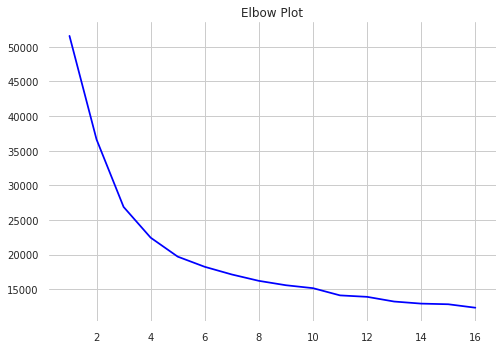

In [103]:
# kmeans plot
plt.plot(K, distortion, 'bx-')
plt.title("Elbow Plot")
plt.grid()
plt.show()

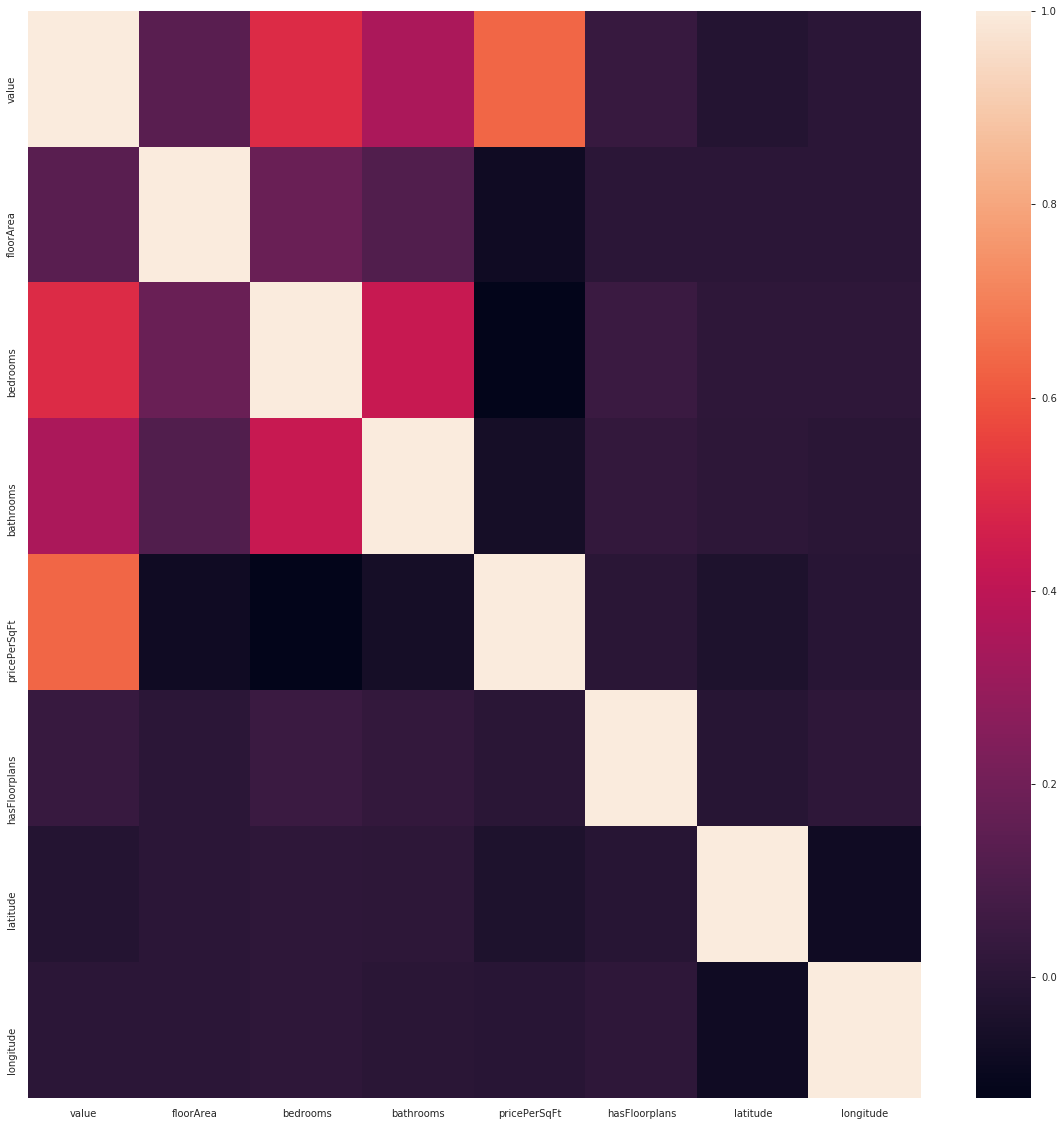

In [104]:
# correlation heat map
plt.figure(figsize=(20,20))
sns.heatmap(train.corr())
plt.show()

In [105]:
# cleaning my data
df = pd.read_csv('drive/My Drive/Housing_Data.csv')
df = df.drop(columns=['Unnamed: 0'])
df['hasFloorplans'] = df['hasFloorplans'].astype(int)
df['latitude'] = df['latitude'].replace({' Partially  Furnished ': np.nan, ' Fully  Furnished ': np.nan, 'Unfurnished': np.nan, 'UNKNOWN': np.nan})
df['latitude'] = df['latitude'].astype(float)
df['longitude'] = df['longitude'].replace({' Partially  Furnished ': np.nan, ' Fully  Furnished ': np.nan, 'Unfurnished': np.nan, 'UNKNOWN': np.nan})
df['longitude'] = df['longitude'].astype(float)
df['floorArea'] = df['floorArea'].replace({'sqft': np.nan })
df['floorArea'].astype(float)
df['bathrooms'].replace({'UNKNOWN': np.NaN}, inplace=True)
df['pricePerSqFt'].replace({'sqrt' : ''}, inplace=True)
df['districtText'].replace({'/':' '}, inplace=True)
df['floorArea'] = df['floorArea'].astype(float)
df['pricePerSqFt'] = df['pricePerSqFt'].replace({'sqft': np.nan}).astype(float)
df['bathrooms'] = df['bathrooms'].astype(float)
dropper = df[df['furnishingCode'] == 'UNKNOWN'].index
df = df.drop(dropper)

train, test = train_test_split(df, test_size=0.2, random_state=22)
train, val = train_test_split(train, test_size = 0.2, random_state=34)
target = 'value'
features = train.columns.drop([target,
                               'pricePerSqFt',
                               'floorArea'])
'''
key poiint for blog
dropping price per square feet and floor area because those two columns were
causing leekage
'''

'''
Student also explains: Why & how they chose their target, metric, and
baseline. How they avoided leakage. When & why the model is (or is not) useful
'''

# train
X_train = train[features]
y_train = train[target]
X_val = val[features]
y_val = val[target]
X_test = test[features]
y_yest = test[target]

#Pipeline
pipeline = make_pipeline(
    # ce.OneHotEncoder(use_cat_names=True),
    ce.OrdinalEncoder(),
    SimpleImputer(strategy='mean'),
    # KMeans(n_clusters=55),
    XGBRegressor(random_state=23, n_jobs=-1)
)

pipeline.fit(X_train, y_train)
y_pred = pipeline.predict(X_val)

print(f'R^2 score: {pipeline.score(X_val, y_val)}')
print(f'mean absolute error: {mae(y_val, y_pred)}')

[19:20:07] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
R^2 score: 0.6495500636592668
mean absolute error: 64863.376360103626


In [106]:
#function to pull out shap values
def shap_val(row, model, encoder):
  #reindex to make row selction easier
  row = X_test.loc[[row]]
  row

  explainer = shap.TreeExplainer(model)
  encoder = encoder
  row_processed = encoder.transform(row)
  shap_values = explainer.shap_values(row_processed)

  shap.initjs()
  return shap.force_plot(
      base_value=explainer.expected_value,
      shap_values=shap_values,
      features=row,
      link='logit')

shap_val(192, pipeline.named_steps['xgbregressor'], pipeline.named_steps['ordinalencoder'])

In [107]:
shap_val(1565, pipeline.named_steps['xgbregressor'], pipeline.named_steps['ordinalencoder'])

In [108]:
# cleaning my data
df = pd.read_csv('drive/My Drive/Housing_Data.csv')
df = df.drop(columns=['Unnamed: 0'])
df['hasFloorplans'] = df['hasFloorplans'].astype(int)
df['latitude'] = df['latitude'].replace({' Partially  Furnished ': np.nan, ' Fully  Furnished ': np.nan, 'Unfurnished': np.nan, 'UNKNOWN': np.nan})
df['latitude'] = df['latitude'].astype(float)
df['longitude'] = df['longitude'].replace({' Partially  Furnished ': np.nan, ' Fully  Furnished ': np.nan, 'Unfurnished': np.nan, 'UNKNOWN': np.nan})
df['longitude'] = df['longitude'].astype(float)
df['floorArea'] = df['floorArea'].replace({'sqft': np.nan })
df['floorArea'].astype(float)
df['bathrooms'].replace({'UNKNOWN': np.NaN}, inplace=True)
df['pricePerSqFt'].replace({'sqrt' : ''}, inplace=True)
df['districtText'].replace({'/':' '}, inplace=True)
df['floorArea'] = df['floorArea'].astype(float)
df['pricePerSqFt'] = df['pricePerSqFt'].replace({'sqft': np.nan}).astype(float)
df['bathrooms'] = df['bathrooms'].astype(float)
dropper = df[df['furnishingCode'] == 'UNKNOWN'].index
df = df.drop(dropper)

train, test = train_test_split(df, test_size=0.2, random_state=22)
train, val = train_test_split(train, test_size = 0.2, random_state=34)
target = 'value'
features = train.columns.drop([target,
                               'pricePerSqFt',
                               'floorArea'])
'''
key poiint for blog
dropping price per square feet and floor area because those two columns were
causing leekage
'''

'''
Student also explains: Why & how they chose their target, metric, and
baseline. How they avoided leakage. When & why the model is (or is not) useful
'''

# train
X_train = train[features]
y_train = train[target]
X_val = val[features]
y_val = val[target]
X_test = test[features]
y_yest = test[target]

#Pipeline
pipeline = make_pipeline(
    # ce.OneHotEncoder(use_cat_names=True),
    ce.OrdinalEncoder(),
    SimpleImputer(strategy='mean'),
    # KMeans(n_clusters=55),
    LinearRegression()
)

pipeline.fit(X_train, y_train)
y_pred = pipeline.predict(X_val)

print(f'R^2 score: {pipeline.score(X_val, y_val)}')
print(f'mean absolute error: {mae(y_val, y_pred)}')

R^2 score: 0.2738142387468083
mean absolute error: 96208.95861541797


In [109]:
X_test

,districtText,furnishingCode,bedrooms,bathrooms,hasFloorplans,latitude,longitude
19575,Pasir Ris / Tampines,PART,4,2.000,1,1.364,103.961
22335,Boon Lay / Jurong / Tuas,PART,3,2.000,1,1.345,103.704
192,Macpherson / Potong Pasir,FULL,2,2.000,1,1.333,103.869
1237,Admiralty / Woodlands,FULL,3,2.000,1,1.443,103.807
13608,Ang Mo Kio / Bishan / Thomson,PART,2,2.000,0,1.367,103.848
...,...,...,...,...,...,...,...
10952,Seletar / Yio Chu Kang,PART,3,2.000,1,1.392,103.873
23272,Tanglin / Holland / Bukit Timah,UNFUR,2,2.000,1,1.311,103.788
5198,Admiralty / Woodlands,PART,3,2.000,0,1.443,103.807
7040,Macpherson / Potong Pasir,PART,3,2.000,0,1.335,103.881


In [0]:

def shap_val(row, model, encoder):
  #reindex to make row selction easier
  row = X_test.loc[[row]]
  row

  explainer = shap.TreeExplainer(model)
  encoder = encoder
  row_processed = encoder.transform(row)
  shap_values = explainer.shap_values(row_processed)

  shap.initjs()
  return shap.force_plot(
      base_value=explainer.expected_value,
      shap_values=shap_values,
      features=row,
      link='logit')

In [0]:
X_test.to_csv('/content/drive/My Drive/X_test.csv')

In [0]:
test.to_csv('/content/drive/My Drive/test.csv')

In [0]:
train.to_csv('/content/drive/My Drive/train.csv')


In [0]:
username = 'Data_alchemist' # your username
api_key = 'BcJBfmUnUv0KG7Jnx4Yb' # your api key - go to profile > settings > regenerate key
chart_studio.tools.set_credentials_file(username=username, api_key=api_key)

In [115]:
import chart_studio.plotly as py
py.plot(fig, filename = 'X_test.cvs', auto_open=True)

'https://plot.ly/~Data_alchemist/50/'

In [116]:
py.plot(fig, filename = 'test.cvs', auto_open=True)

'https://plot.ly/~Data_alchemist/53/'

In [117]:
py.plot(fig, filename = 'train.cvs', auto_open=True)

'https://plot.ly/~Data_alchemist/55/'

In [120]:
py.plot(fig, filename= 'Housing_Data.cvs', auto_open=True)

'https://plot.ly/~Data_alchemist/62/'